In [2]:
pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/competitions/image-classifications/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: daniintellipaat
Your Kaggle Key: ··········


100%|██████████| 79.1M/79.1M [00:01<00:00, 47.8MB/s]



Extracting archive ./image-classifications/image-classifications.zip to ./image-classifications


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/image-classifications/train.csv')

In [7]:
df

,ID,1,2,3,4,5,6,7,8,9,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,Class
0,201,135,133,131,130,130,130,129,128,126,...,55,52,55,52,52,54,52,52,52,0
1,202,190,212,211,200,204,234,253,253,254,...,48,58,49,45,93,89,64,42,48,1
2,203,228,227,226,223,221,219,217,215,212,...,49,49,49,49,50,50,50,50,50,1
3,204,216,216,216,216,216,216,216,216,216,...,169,181,182,181,178,168,160,167,170,1
4,205,196,189,164,199,200,199,198,197,196,...,111,115,115,122,130,121,125,125,121,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1216,94,98,103,109,111,110,105,102,101,...,47,41,45,32,25,25,25,24,23,0
1016,1217,252,253,253,253,253,253,252,251,253,...,192,197,191,173,147,146,189,209,194,0
1017,1218,46,50,65,101,93,133,30,33,64,...,152,177,157,103,78,79,77,76,82,0
1018,1219,255,255,255,255,255,255,255,255,255,...,184,182,169,173,187,189,192,209,228,1


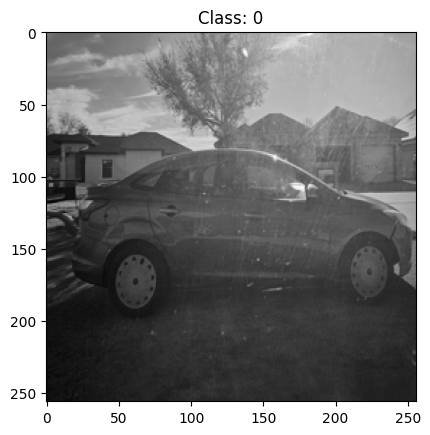

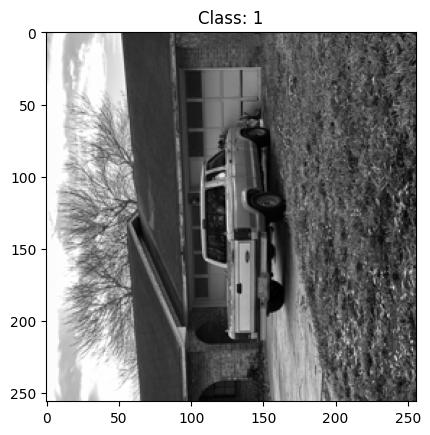

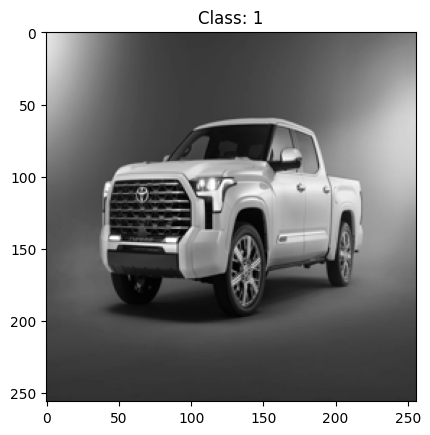

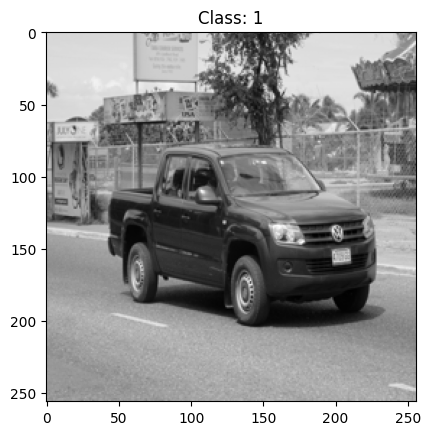

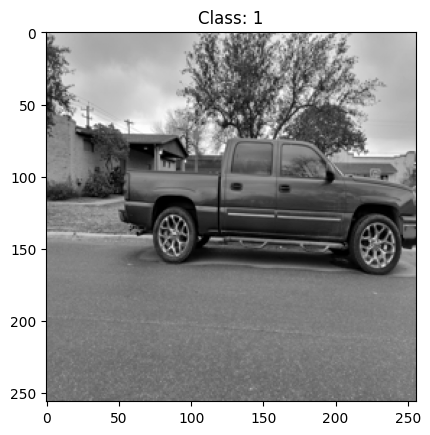

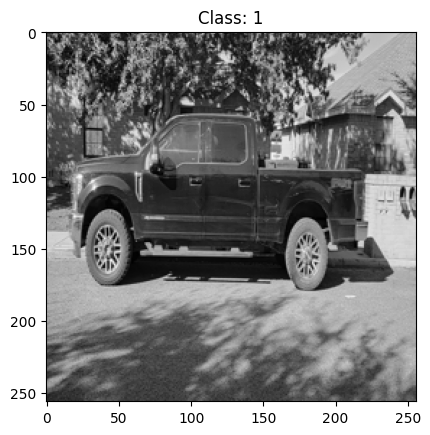

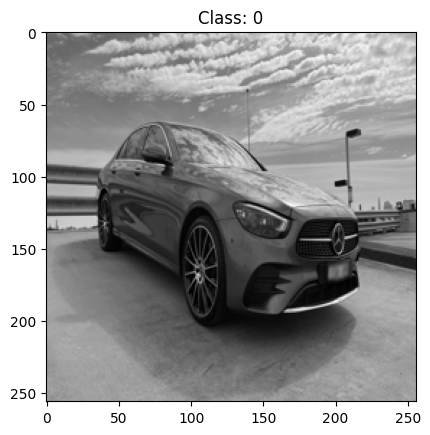

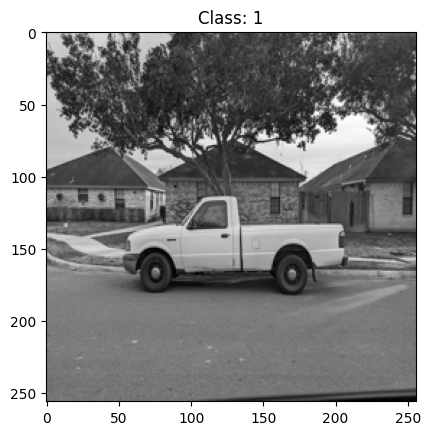

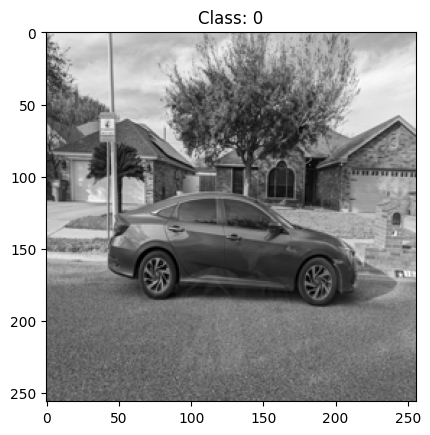

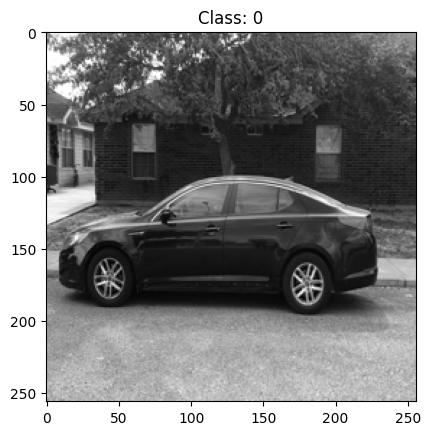

In [8]:
pixels = df.drop(columns=['ID', 'Class'])
class_labels = df['Class']

# Assuming the images are square, find the side length (assuming they are square)
image_side_length = int(np.sqrt(len(pixels.columns)))

# Reshape the pixel values to image dimensions
images = pixels.values.reshape(-1, image_side_length, image_side_length)

# Display a few images along with their class labels
num_images_to_display = 10
for i in range(num_images_to_display):
    plt.imshow(images[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Class: {class_labels[i]}')
    plt.show()

In [9]:
df.isnull().sum()

ID       0
1        0
2        0
3        0
4        0
        ..
65533    0
65534    0
65535    0
65536    0
Class    0
Length: 65538, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1020, 65538)

In [12]:
class_labels.dropna(inplace=True)

In [13]:
class_labels.shape

(1020,)

In [14]:
labels = np.asarray(class_labels)
data = np.asarray(df)

In [15]:
data

array([[ 201,  135,  133, ...,   52,   52,    0],
       [ 202,  190,  212, ...,   42,   48,    1],
       [ 203,  228,  227, ...,   50,   50,    1],
       ...,
       [1218,   46,   50, ...,   76,   82,    0],
       [1219,  255,  255, ...,  209,  228,    1],
       [1220,   86,   86, ...,   72,  102,    0]])

In [16]:
data.shape

(1020, 65538)

In [17]:
labels

array([0, 1, 1, ..., 0, 1, 0])

In [18]:
labels.shape

(1020,)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2, shuffle=True,stratify=labels)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
RF=RandomForestClassifier()

In [23]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred=RF.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred)

0.6519607843137255

In [26]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1])

In [27]:
test=pd.read_csv('/content/image-classifications/test.csv')

In [28]:
test

,ID,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
0,1,189,191,197,201,204,198,195,198,199,...,153,117,156,144,145,147,148,182,167,174
1,2,173,177,182,187,188,190,195,211,204,...,201,215,217,205,202,206,207,202,203,195
2,3,95,97,99,97,93,94,94,92,92,...,167,160,161,174,189,179,175,185,172,157
3,4,216,216,217,218,217,217,220,221,222,...,76,70,77,102,96,86,103,109,83,86
4,5,84,82,57,113,101,83,65,139,87,...,159,158,153,148,171,193,149,136,153,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,202,202,202,202,202,202,202,201,202,...,210,210,211,210,212,210,210,209,208,209
196,197,187,191,190,186,186,188,188,188,182,...,53,51,46,77,111,119,183,150,110,108
197,198,165,168,169,169,171,172,174,175,175,...,146,145,142,154,141,141,142,134,152,154
198,199,237,236,235,236,238,239,236,233,231,...,150,142,147,150,154,149,162,151,151,149


In [29]:
test=pd.DataFrame(test)

In [30]:
test

,ID,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
0,1,189,191,197,201,204,198,195,198,199,...,153,117,156,144,145,147,148,182,167,174
1,2,173,177,182,187,188,190,195,211,204,...,201,215,217,205,202,206,207,202,203,195
2,3,95,97,99,97,93,94,94,92,92,...,167,160,161,174,189,179,175,185,172,157
3,4,216,216,217,218,217,217,220,221,222,...,76,70,77,102,96,86,103,109,83,86
4,5,84,82,57,113,101,83,65,139,87,...,159,158,153,148,171,193,149,136,153,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,202,202,202,202,202,202,202,201,202,...,210,210,211,210,212,210,210,209,208,209
196,197,187,191,190,186,186,188,188,188,182,...,53,51,46,77,111,119,183,150,110,108
197,198,165,168,169,169,171,172,174,175,175,...,146,145,142,154,141,141,142,134,152,154
198,199,237,236,235,236,238,239,236,233,231,...,150,142,147,150,154,149,162,151,151,149


In [31]:
pred=pd.DataFrame(y_pred)

In [32]:
pred

,0
0,1
1,0
2,1
3,0
4,1
...,...
199,0
200,0
201,1
202,0


In [33]:
test['pred']=pred

In [34]:
test

,ID,1,2,3,4,5,6,7,8,9,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,pred
0,1,189,191,197,201,204,198,195,198,199,...,117,156,144,145,147,148,182,167,174,1
1,2,173,177,182,187,188,190,195,211,204,...,215,217,205,202,206,207,202,203,195,0
2,3,95,97,99,97,93,94,94,92,92,...,160,161,174,189,179,175,185,172,157,1
3,4,216,216,217,218,217,217,220,221,222,...,70,77,102,96,86,103,109,83,86,0
4,5,84,82,57,113,101,83,65,139,87,...,158,153,148,171,193,149,136,153,154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,202,202,202,202,202,202,202,201,202,...,210,211,210,212,210,210,209,208,209,1
196,197,187,191,190,186,186,188,188,188,182,...,51,46,77,111,119,183,150,110,108,1
197,198,165,168,169,169,171,172,174,175,175,...,145,142,154,141,141,142,134,152,154,0
198,199,237,236,235,236,238,239,236,233,231,...,142,147,150,154,149,162,151,151,149,0


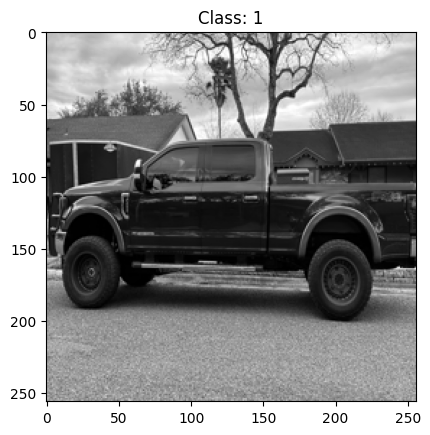

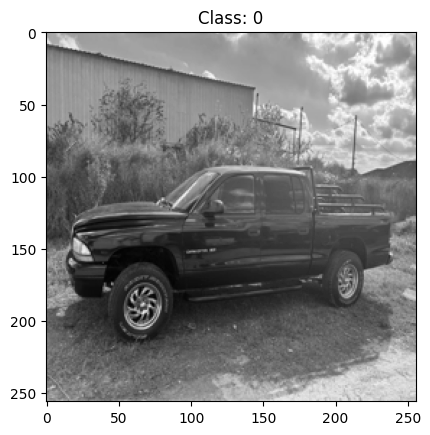

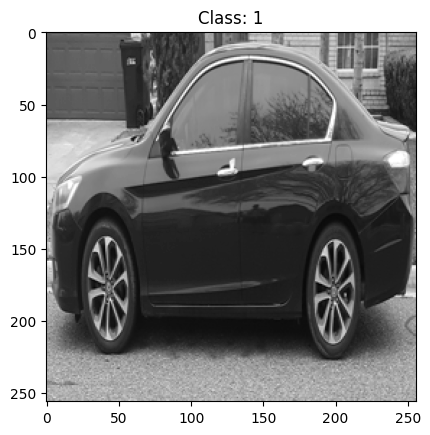

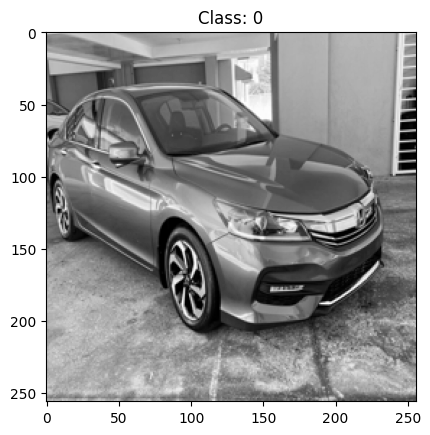

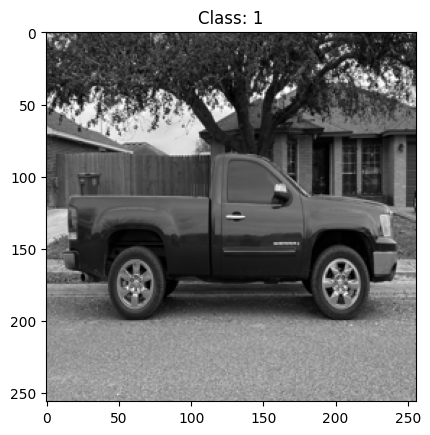

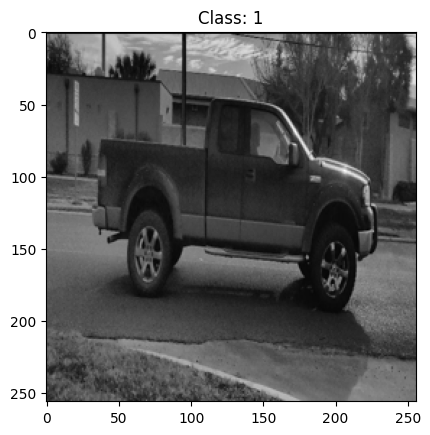

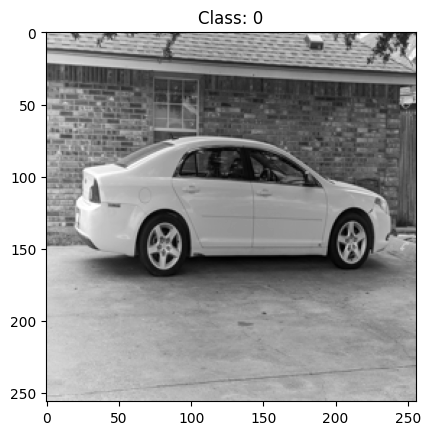

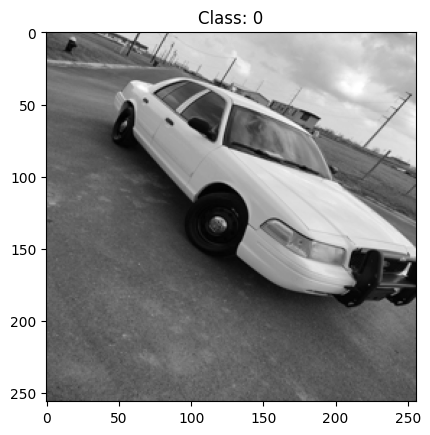

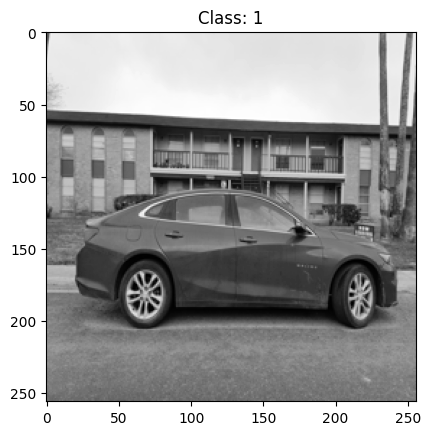

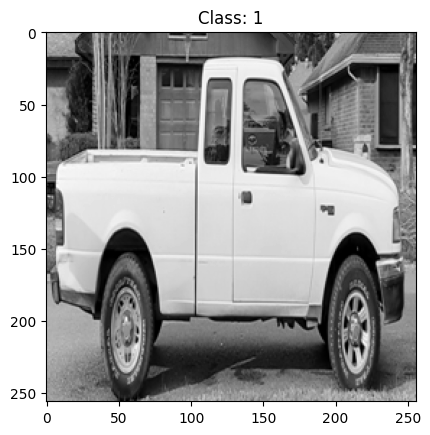

In [35]:
pixels = test.drop(columns=['ID', 'pred'])
class_labels = test['pred']

# Assuming the images are square, find the side length (assuming they are square)
image_side_length = int(np.sqrt(len(pixels.columns)))

# Reshape the pixel values to image dimensions
images = pixels.values.reshape(-1, image_side_length, image_side_length)

# Display a few images along with their class labels
num_images_to_display = 10
for i in range(num_images_to_display):
    plt.imshow(images[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Class: {class_labels[i]}')
    plt.show()

In [36]:
parameters=[{'max_depth':np.arange(4,10),
             'min_samples_split':np.arange(2,5),
             'random_state':[3]}]

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
#Define Search
search=RandomizedSearchCV(RF,parameters,scoring='accuracy')

In [39]:
#Execute the search
result=search.fit(x_train,y_train)

In [40]:
result.best_score_

0.6727517581924285

In [42]:
best=result.best_params_

In [43]:
rf=RandomForestClassifier(**best)

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=3, random_state=3)

In [45]:
y_pred=rf.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.7303921568627451